Importe

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import modules

import more_itertools

Lesen der Daten


Welche Daten sind verfügbar und Laden des Datensatzes

In [21]:
col_list= ["case_status","case_number","case_no", "decision_date", "case_received_date","application_type", "class_of_admission"]
visas_df = pd.read_csv("us_perm_visas.csv", usecols=col_list)
visas_df.head ()

C:\Users\lassu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,decision_date
0,PERM,A-07323-97014,NaN,NaN,Certified,J-1,2012-02-01
1,PERM,A-07332-99439,NaN,NaN,Denied,B-2,2011-12-21
2,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,2011-12-01
3,PERM,A-07339-01930,NaN,NaN,Certified,B-2,2011-12-01
4,PERM,A-07345-03565,NaN,NaN,Certified,L-1,2012-01-26


Untersuchung der vorliegenden Daten im Datensatz


In [22]:
# df = pd.read_csv('us_perm_visas.csv', low_memory = False, parse_dates=['decision_date', 'case_received_date'])
visas_df ["decision_date"]=pd.to_datetime(visas_df["decision_date"])
visas_df ["case_received_date"]=pd.to_datetime(visas_df["case_received_date"])

Überprüfung der Anzahl der Visa Bewerbungen bzw. Fälle (Zeilen und Spalten)


In [23]:
print('Number of Visa Applications:', len(visas_df))
print('Number of Columns:', len(visas_df.columns))

Number of Visa Applications: 374362
Number of Columns: 7


Ersten fünf Zeilen anzeigen lassen zum checken

In [24]:
visas_df.head()

,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,decision_date
0,PERM,A-07323-97014,NaN,NaT,Certified,J-1,2012-02-01
1,PERM,A-07332-99439,NaN,NaT,Denied,B-2,2011-12-21
2,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,2011-12-01
3,PERM,A-07339-01930,NaN,NaT,Certified,B-2,2011-12-01
4,PERM,A-07345-03565,NaN,NaT,Certified,L-1,2012-01-26


Letze fünf Zeilen anzeigen lassen zum checken

In [25]:
visas_df.tail()

,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,decision_date
374357,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,2016-12-30
374358,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,2016-12-30
374359,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,2016-12-30
374360,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,2016-12-30
374361,NaN,NaN,A-16279-59292,2016-12-30,Withdrawn,H-1B,2016-12-30


Namen der Spalten anzeigen lassen


In [26]:
print(visas_df.columns.values)

['application_type' 'case_no' 'case_number' 'case_received_date'
 'case_status' 'class_of_admission' 'decision_date']


Die Werte case_number und case_no könnten ähnliche Informationen beinhalten. Daher überprüfen wir  Länge, Anzahl der fehlenden Werte und Beispielwerte

In [27]:
print("Length of 'case_number' column is: ", len(visas_df['case_number'])," with",visas_df.case_number.isnull().sum(), "missing values")
print("Length of 'case_no' column is: ", len(visas_df['case_no'])," with", visas_df.case_no.isnull().sum(),"missing values \n")

print("First 2 values of case_number column are : \n", visas_df['case_number'].head(2),"\n")

print("Last 2 values of case_number column are : \n", visas_df['case_number'].tail(2), "\n")
print("First 2 values of case_no column are : \n", visas_df['case_no'].head(2), "\n")
print("Last 2 values of case_no column are : \n", visas_df['case_no'].tail(2))

Length of 'case_number' column is:  374362  with 135269 missing values
Length of 'case_no' column is:  374362  with 239093 missing values 

First 2 values of case_number column are : 
 0    NaN
1    NaN
Name: case_number, dtype: object 

Last 2 values of case_number column are : 
 374360    A-16357-84250
374361    A-16279-59292
Name: case_number, dtype: object 

First 2 values of case_no column are : 
 0    A-07323-97014
1    A-07332-99439
Name: case_no, dtype: object 

Last 2 values of case_no column are : 
 374360    NaN
374361    NaN
Name: case_no, dtype: object


Wie erwartet sind die Werte in case_number und case_no ähnlich. Eine Addition der NaN Werte der Spalten case_number und case_no ergeben die Gesamtzahl der Fälle.
Daher erstellen wir eine neue Spalte die keine fehlenden Werte beinhaltet.

In [28]:
case_noindex = visas_df.columns.get_loc('case_no')
case_noindexnumber = visas_df.columns.get_loc('case_number')
casenumberlist = []


for value in visas_df.iloc[0:135269,case_noindex]:
    casenumberlist.append(value)

for value in visas_df.iloc[135269:374362,case_noindexnumber]:
    casenumberlist.append(value)

visas_df['casenumber'] = casenumberlist
visas_df.drop(visas_df.columns[[case_noindex,case_noindexnumber]], axis=1, inplace=True)


In [29]:
modules.print_full(visas_df['application_type'].value_counts()[:1000])

ONLINE      112564
PERM         20576
MAILEDIN      2129
Name: application_type, dtype: int64


[Text(0, 0.5, 'casenumber'), Text(0.5, 0, 'application_type')]

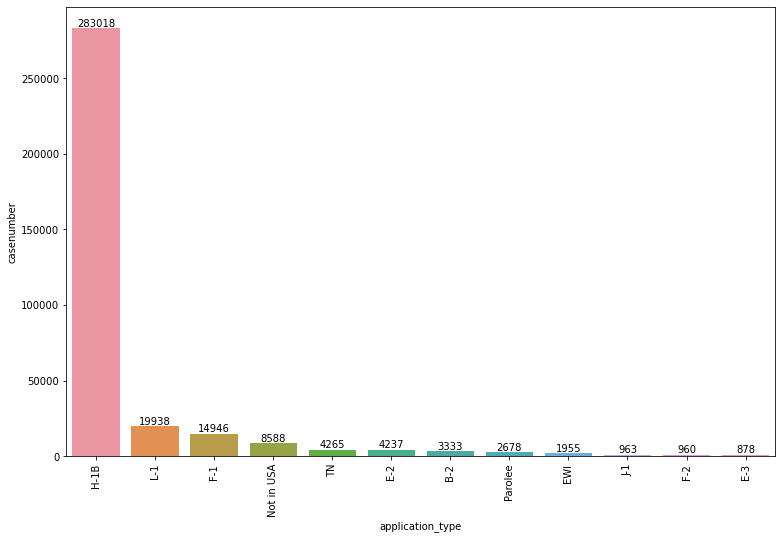

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.countplot(x='class_of_admission',data=visas_df,
              order=visas_df.class_of_admission.value_counts().iloc[:12].index)
plt.xticks(rotation=90)

#Iterating over elements in "class_of_admission" column and displaying counts above bars
for i, v in visas_df.class_of_admission.value_counts().head(12).reset_index().iterrows():
    ax.text(i,v.class_of_admission,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')

ax.set(xlabel='application_type', ylabel='casenumber')


Das häufigste Visa das gestellt wird ist das H1-B Visum (Für hochqualifizierte Fachkräfte und Personen mit einem akademischen Abschluss),
https://www.usvisaservice.de/visum-usa/